<a href="https://colab.research.google.com/github/niklasfaller/DIS21-BIg-Data/blob/main/Ex5_Predicting_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 5th exercise: <font color="#C70039">Predicting house prices by a regression</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: Niklas Faller 11154696
* Date: 08.01.2024

<img src="https://miro.medium.com/max/876/0*YnFjHIvXcDv8oL3q." style="float: center;" width="300">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information about your tasks (e.g. regarding the set of certain paramaters or specific computational tricks, etc.), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
The previous exercises were dealing with classification problems, where the goal was to predict a single discrete/categorial label. As you have learned already, another common type of machine learning problem is *regression*, which consists of predicting a continuous value instead of a discrete label.
For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a
software project will take to complete, given its specifications.
Make sure, you do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm, it is a classification algorithm. :-)

This notebook allows you for predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.
The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

-----------------------
### <font color="FFC300">TASKS</font>:
Within this notebook, the tasks that you need to work on are always listed as bullet points below.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * for better understanding, add comments whereever you feel it necessary
    * run the notebook for the first time and note the result in your markdown result table (your test plan).
4. go into the section 'building the ANN'.
    * add the missing code that does create a network as shown in the image in the lecture slides on page 179 (File: 'DIS21a.1-7.HANDS_ON.First.DLNetwork.Architectures.for.Solving.Three.Interesting.Problems.pdf')
    * set the activation function to ReLu
    * set the correct activation function in the last layer/the output. What is correct when doing a regression?
    * add the missing code for compiling the network by setting
        * the loss function (keep in mind you are building a regression model)
        * the optimizer
        * the evaluation metric (keep in mind you are building a regression model)
5. optimize the hyperparameters of the model as you are still some good way off the actual price.
    * compute the minimum of the number of epochs which you can see in the chart
    * increase the batch size
    * adjust the size of the hidden layers
6. build a production model and test on the test data.

-----------------


## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------

In [ ]:
import tensorflow
#tensorflow.keras.__version__

### loading the house price data set

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

--------------

### data preparation

As you can see, there are 404 training samples and 102 test samples. The data consists of 13 features. The 13 features in the input data are as follows:

1. Per capita crime rate (Pro-Kopf-Verbrechensrate).
2. Proportion of residential land zoned for lots over 25.000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per US$ 10.000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of black people by town.
    * Unbelievable, this attribute was taken into account back then (Comment: Gernot Heisenberg)
13. % lower status of the population.

If you want to read more about the Boston housing data set click here:
<a href="https://www.kaggle.com/c/boston-housing">https://www.kaggle.com/c/boston-housing</a>

The targets are the median values of owner-occupied homes, in thousands of dollars.
The prices are typically between US$ 10.000 - 50.000.

In [ ]:
train_targets.shape

(404,)

In [ ]:
train_targets[0:100]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7])

As you have learned in the lecture, into an ANN, it is going to be problematic to feed values that all take wildly different ranges. The ANN might be able to automatically adapt to such heterogeneous data but it would definitely make learning more difficult, since attributes are not comparable.
Hence, standardization of the attributes is needed:
* For each attribute in the input data (a column in the input data matrix),  subtract the mean of the attribute and divide by the standard deviation, so that the attribute will be centered around 0 and will have a unit standard deviation.
* This is called z-score-standardization (see lecture slides) and can be easily done using python's standard lib:

In [ ]:
# compute mean and stddev
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

<font color="red">Note:</font>The quantities that are used for standardizing the test data have been computed using the training data. Never, never, never ever in your life, compute any quantity on test data, even not for something as simple as data standardization (compare lecture slides).

### building the ANN

Because so very few samples are available, it will be best using a small network.
In general, the less training data there is, the worse overfitting will be, and using a small network is one (of several) ways to fight overfitting.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Because you will need to instantiate the same model multiple times,
# it is better to implement a build function to construct the model.
# Also compile the network here in this function.

def build_model(hiddenlayer_units, hidden_activation, optimizer, loss, metrics):
    model = models.Sequential()

    model.add(layers.Dense(hiddenlayer_units, activation = hidden_activation, input_shape = (13,)))
    model.add(layers.Dense(hiddenlayer_units, activation = hidden_activation))
    model.add(layers.Dense(1))
    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)


    return model

### validating the model using k-fold validation

You have learned during the lectures, that simple hold-out validation, is the way to go. But it is simply not the case, if data is really small. The best practice in such situations is to use k-fold cross-validation. It consists of splitting the available data into k partitions (typically k= 4 or 5), then instantiating k identical models, and training each one on k-1 partitions while evaluating on the remaining partition. The validation score for the model used would then be the average of the k validation scores obtained.

In terms of code, this is straight forward!

In [ ]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k # floor/integer division (see https://www.programiz.com/python-programming/operators also)
num_epochs = 100
all_scores = []

# loop over all folds, k-times
for i in range(k):
    print('processing ' + str(i+1) + '.fold')

    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                             train_data[(i + 1) * num_val_samples:]],
                            axis=0)

    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                             train_targets[(i + 1) * num_val_samples:]],
                            axis=0)

    # Build the model (each model should be build with the same parameters)
    model = build_model(64, 'relu', 'rmsprop', 'mse', ['mae'])

    # Train the model (set the silent mode by verbose=0)
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)

    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing 1.fold
processing 2.fold
processing 3.fold
processing 4.fold


In [ ]:
# show the scores each fold has predicted on the validation data
all_scores

[1.9989911317825317,
 2.6361007690429688,
 2.6614673137664795,
 2.4776151180267334]

In [ ]:
# take the average of all scores
np.mean(all_scores)

2.4435435831546783

As you can see, the different runs do indeed show rather different validation scores, from 2.0 to 2.77.
Their average (2.4) is a much more reliable metric than any single of these scores -- that is the entire point of K-fold cross-validation.

In this case, we are off by approximately USD 2.400 on average, which is still significant considering that the prices range from US$ 10.000-50.000.

-------------

#### new training and validation
Let's train the network for a bit longer: 500 epochs.
To keep a record of how well the model did after each epoch, we will modify our training loop to save the per-epoch validation score log:

In [ ]:
# Do some memory clean up
from tensorflow.keras import backend as K
K.clear_session()

In [ ]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing ' + str(i+1) + '.fold')

    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
                        [train_data[:i * num_val_samples],
                         train_data[(i + 1) * num_val_samples:]],
                        axis=0)

    partial_train_targets = np.concatenate(
                        [train_targets[:i * num_val_samples],
                         train_targets[(i + 1) * num_val_samples:]],
                        axis=0)

    # Build the model (each model should be build with the same parameters)
    model = build_model(64, 'relu', 'rmsprop', 'mse', ['mae'])

    # Train the model (in silent mode, verbose=0)
    '''Write everything to the history object and explore it afterwards (see below)'''
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)

    print("history.history.keys = ", history.history.keys())
    print("--------------------------------------------------")
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing 1.fold
history.history.keys =  dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
--------------------------------------------------
processing 2.fold
history.history.keys =  dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
--------------------------------------------------
processing 3.fold
history.history.keys =  dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
--------------------------------------------------
processing 4.fold
history.history.keys =  dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
--------------------------------------------------


Compute the average of the per-epoch MAE scores for all folds

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let's plot the average_mae_history scores using pyplot

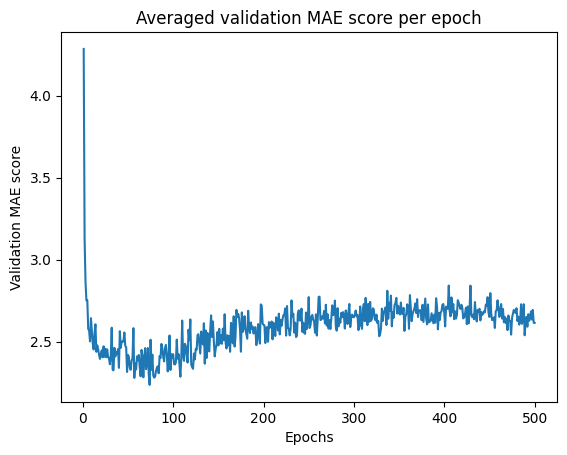

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE score')
plt.title("Averaged validation MAE score per epoch")
plt.show()


It may be a bit hard to see the plot due to scaling problems (high value at the beginning)
and the high variance of the data.

For improving this, let's do the following:

1. Omit the first 10 data points, which are on a different scale than the rest of the curve.
2. Replace each point with an exponential moving average of the previous points, to obtain a smoother curve.
    * this is a common technique for dealing with signals (i.e. time series) of any kind, especially financial stock data.

Even though, you can also scale the chart bigger if you want.

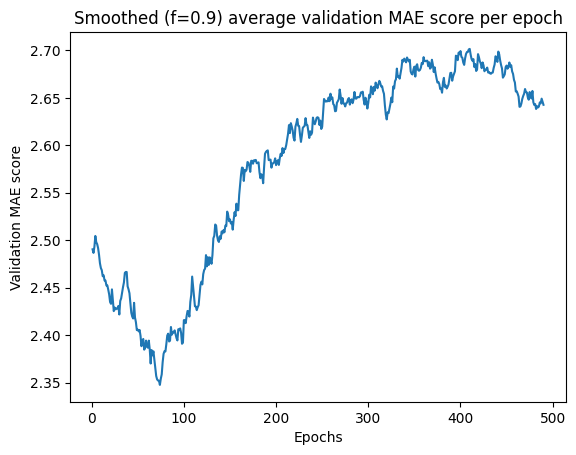

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:]) # get rid of the first 10 data points
factor = '0.9'
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE score')
plt.title("Smoothed (f="+ factor + ") average validation MAE score per epoch")
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after some epochs, and the model starts overfitting.

### Your  task now (see task list items 5 and 6 also)

5. optimize the hyperparameters of your model
    * try to compute the minimum number of epochs after the model starts overfitting
    * adjust the batch size
    * adjust the number of hidden layers
    * <font color="#C70039">Work again with a table to not get lost and reflect a good test plan</font>
    
6. Now, you can start training a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data

In [ ]:
# Get a fresh, compiled model and optimize all hyperparameters
model = build_model(64, 'relu', 'rmsprop', 'mse', ['mae'])

history = model.fit(train_data, train_targets,
                    validation_data = (val_data, val_targets),
                    epochs = 80, batch_size = 1, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 12.7228 - mae: 2.3039


In [ ]:
test_mae_score # print out the score

2.3039355278015137

In [ ]:
# Get a fresh, compiled model and optimize all hyperparameters
model = build_model(64, 'relu', 'rmsprop', 'mse', ['mae'])

history = model.fit(train_data, train_targets,
                    validation_data = (val_data, val_targets),
                    epochs = 80, batch_size = 2, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.0319 - mae: 2.5362


In [ ]:
test_mae_score # print out the score

2.536205291748047

In [ ]:
# Get a fresh, compiled model and optimize all hyperparameters
model = build_model(64, 'relu', 'rmsprop', 'mse', ['mae'])

history = model.fit(train_data, train_targets,
                    validation_data = (val_data, val_targets),
                    epochs = 80, batch_size = 1, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.1527 - mae: 2.7625


In [ ]:
test_mae_score # print out the score

2.762493133544922